# Machine Learning - Assignment 6

---

## Backpropagation

> Name: Ankhbold Batbaatar \
> Student ID: TK240009

# Corpus

> Will you still need me, will you still feed me, when I am 64.

In [233]:
# @title Base Imports

# For matrix calculation purposes.
import numpy as np

# For visualization purposes.
import pandas as pd
import matplotlib.pyplot as plt

# For stability purposes.
np.random.seed(42)


In [234]:
#
# Encodings of the sentence.
# There should be more, but I am too lazy to encoded the rest.
# These three are all we need.
#
encodings = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

# Indices to work with.
target_index = 1
input_indices = [0, 2]

# Kaminuma's recommendation :)
learning_rate = 0.01

# Define neural network layer sizes
input_layer_shape = encodings.shape[1]
hidden_layer_shape = 3


In [235]:
# @title Softmax

#
# Ok, I see what you meant with the definition.
# But, it is also super confusing the way it was written in the hints PPTX.
# I took it as e^(x_i - x_max(i)) being the entire equation since that's what it read like.
# Maybe I just suck at reading I don't know.
# Anyway, I think you mean "safe softmax":
#
def softmax(x: np.ndarray) -> np.ndarray:
    """This softmax function implements the following equation:
    exp(x_i - x_(max)).

    This can be called "safe softmax" as at most, the exponential will result in one.
    """

    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)


In [236]:
# @title Test Softmax

def test_softmax():
    """Check if the `softmax` function works as intended."""

    elements = np.array([0, 10])
    result = softmax(elements)
    print(result)

test_softmax()


[4.53978687e-05 9.99954602e-01]


In [237]:
# @title Cross Entropy Loss

def cross_entropy_loss(predicted: np.ndarray, target: np.ndarray) -> float:
    """Calculates the cross entropy loss between predicted and target variables.
    It adheres to the following equation in plain words:
    Sum of the products of logarithms of predicted value and target value.
    """
    loss = lambda pred, true: -1 * np.log(pred) * true

    sum = 0.0
    for pred_i, true_i in zip(predicted, target):
        sum += loss(pred_i, true_i)

    return sum


In [238]:
# @title Weight Initialization

# Input weight matrix
W_input = np.random.rand(input_layer_shape, hidden_layer_shape)

# Output weight matrix
W_output = np.random.rand(hidden_layer_shape, input_layer_shape)


# Forward Pass

In [239]:
# @title Hidden Layer

# Multiply the encodings with the weights and calculate the mean.
# This is out hidden layer output.
h_embedding_mean = np.add(*[np.matmul(encodings[i], W_input) for i in input_indices]) / len(input_indices)

print(h_embedding_mean)


[0.21631187 0.90844523 0.66655448]


In [240]:
# @title Output layer

# Mutiply the hidden layer output with the output weights.
# This will be out output layer output!
logits = np.matmul(h_embedding_mean, W_output)

print(logits)


[0.8216225  0.3699267  1.58122095 1.03717145 1.0671398  1.28175078
 0.6445317  1.56887703 0.18605984 0.97916503 0.62325653 0.5404965 ]


In [241]:
# @title Predictions (Normalized with Softmax)

# Normalize the output so that it becomes a probability distribution where it all adds to one.
predictions = softmax(logits)

print(predictions)


[0.07091576 0.04514127 0.1515766  0.08797403 0.09065037 0.11235022
 0.05940639 0.14971705 0.03755964 0.08301615 0.05815586 0.05353666]


In [242]:
# @title Verify Softmax

# This should be one.
print(np.sum(predictions))


1.0


In [243]:
# @title Loss

# This will serve as our benchmark.
# Other than looking closely at the predictions by our own eyes of course.
loss = cross_entropy_loss(predictions, encodings[target_index])

print(loss)


3.0979584131572033


# Backward Pass

In [244]:
# @title Loss Gradient (Derivative of Loss with Respect to Logits)

#
# dL/dz or d_loss/d_logits.
# This can be thought of as being the difference between the target values and predicted values.
#
# dL/dz = p_i - o_i
# where o is the target value and p is the predicted value and i is the output layer index.
#
dL_dlogits = encodings[target_index] - predictions

print(dL_dlogits)


[-0.07091576  0.95485873 -0.1515766  -0.08797403 -0.09065037 -0.11235022
 -0.05940639 -0.14971705 -0.03755964 -0.08301615 -0.05815586 -0.05353666]


In [245]:
# @title Derivative of Loss with Respect to the Output Weight

#
# dL/dW_output = (p_i - o_i) * h_j
# where h is the hidden layer output and j is the hidden layer index.
#
# P.S. I mistook "外積" as the cross product of vectors in the hints PPTX.
# I guess you meant the outer product of matrices (I knew it as "直積" only).
# Isn't language beautiful? No wonder mathematical notations exist.
#
dL_dW_output = np.ndarray(W_output.shape)
for j in range(hidden_layer_shape):
    for i in range(input_layer_shape):
        dL_dW_output[j][i] = dL_dlogits[i] * h_embedding_mean[j]

print(dL_dW_output)


[[-0.01533992  0.20654727 -0.03278782 -0.01902983 -0.01960875 -0.02430269
  -0.01285031 -0.03238557 -0.0081246  -0.01795738 -0.0125798  -0.01158061]
 [-0.06442308  0.86743686 -0.13769904 -0.07991958 -0.08235089 -0.10206402
  -0.05396746 -0.13600974 -0.03412087 -0.07541563 -0.05283142 -0.04863512]
 [-0.04726922  0.63646536 -0.10103406 -0.05863948 -0.06042341 -0.07488754
  -0.0395976  -0.09979457 -0.02503554 -0.05533479 -0.03876405 -0.0356851 ]]


In [246]:
# We can also use just numpy to calculate outer product!
demonstration = np.outer(dL_dlogits, h_embedding_mean)
print(demonstration.T)

[[-0.01533992  0.20654727 -0.03278782 -0.01902983 -0.01960875 -0.02430269
  -0.01285031 -0.03238557 -0.0081246  -0.01795738 -0.0125798  -0.01158061]
 [-0.06442308  0.86743686 -0.13769904 -0.07991958 -0.08235089 -0.10206402
  -0.05396746 -0.13600974 -0.03412087 -0.07541563 -0.05283142 -0.04863512]
 [-0.04726922  0.63646536 -0.10103406 -0.05863948 -0.06042341 -0.07488754
  -0.0395976  -0.09979457 -0.02503554 -0.05533479 -0.03876405 -0.0356851 ]]


In [247]:
# @title Derivative of Loss with Respect to the Hidden Layer Embedding Mean

#
# dL/dembedding_mean = (p_i - o_i) * (W_output)^T
# where T is the transpose matrix.
#
dL_dembedding_mean = np.matmul(dL_dlogits, W_output.T)

print(dL_dembedding_mean)


[-0.38634453 -0.47629855 -0.28065559]


In [248]:
# @title Initializion of the Matrix of the Derivative of Loss with Respect to the Input Weight

# We will add onto this, so initialize all cells with zero.
dL_dW_input = np.zeros(W_input.shape)


In [249]:
# @title Derivative of Loss with Respect to the Input Weight

#
# dL/dW_input = dL/dembeddings_mean * 1/2 * x_k = (p_i - o_i) * (W_output)^T * 1/2 * x_k
# where x is the word encoding and k is the index of the word encoding.
#
for k in input_indices:
    for i in range(input_layer_shape):
        for j in range(hidden_layer_shape):
            dL_dW_input[i][j] += dL_dembedding_mean[j] * encodings[k][i] / 2

print(dL_dW_input)


[[-0.19317226 -0.23814927 -0.14032779]
 [ 0.          0.          0.        ]
 [-0.19317226 -0.23814927 -0.14032779]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


In [250]:
# @title Update Weights by Learning Rate

W_output -= learning_rate * dL_dW_output
W_input -= learning_rate * dL_dW_input


In [251]:
# @title Print Updated Weights

print("Output Layer Weights\n", W_output)
print()
print("Input Layer Weights\n", W_input)


Output Layer Weights
 [[0.30476717 0.09560664 0.6845609  0.44034279 0.12223432 0.49541994
  0.03451702 0.90964426 0.25886123 0.66270186 0.31183687 0.52018383]
 [0.54735451 0.17618009 0.97096162 0.77593202 0.94032245 0.89584799
  0.59843965 0.92323433 0.08883371 0.19673702 0.0457556  0.32581668]
 [0.38914998 0.26498438 0.82974785 0.35733972 0.28153874 0.54344496
  0.1413202  0.80319493 0.074801   0.98744028 0.77263241 0.19907253]]

Input Layer Weights
 [[0.37647184 0.9530958  0.73339722]
 [0.59865848 0.15601864 0.15599452]
 [0.06001533 0.86855764 0.60251829]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289]
 [0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378]
 [0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159]
 [0.94888554 0.96563203 0.80839735]]


In [252]:
# @title Training

# Combine all the previous steps into one cohesive training loop.

output_df = None
input_df = None
logits_df = None
predictions_df = None

# Record the loss of each epoch for visualization purposes.
history: dict[int, float] = dict()

#
# Epoch count could be whatever.
# Epoch count of 400 was chosen for no particular reason other than showing a nice looking loss graph.
# We are not really concerned with hyperparameter optimization this time.
#
for epoch in range(400):
    h_embedding_mean = np.add(*[np.matmul(encodings[i], W_input) for i in input_indices]) / len(input_indices)
    logits = np.matmul(h_embedding_mean, W_output)
    predictions = softmax(logits)
    loss = cross_entropy_loss(predictions, encodings[target_index])

    # Record loss per epoch.
    history[epoch] = loss

    # For logging purposes.
    if epoch % 10 == 0:
        print(f"[{epoch + 1}] Loss: {loss}")

    dL_dlogits = predictions - encodings[target_index]

    dL_dW_output = np.ndarray(W_output.shape)
    for j in range(hidden_layer_shape):
        for i in range(input_layer_shape):
            dL_dW_output[j][i] = dL_dlogits[i] * h_embedding_mean[j]

    dL_dembedding_mean = np.matmul(dL_dlogits, W_output.T)

    dL_dW_input = np.zeros(W_input.shape)
    for k in input_indices:
        for i in range(input_layer_shape):
            for j in range(hidden_layer_shape):
                dL_dW_input[i][j] += dL_dembedding_mean[j] * encodings[k][i] / 2

    W_output -= learning_rate * dL_dW_output
    W_input -= learning_rate * dL_dW_input
else:
    h_embedding_mean = np.add(*[np.matmul(encodings[i], W_input) for i in input_indices]) / len(input_indices)
    logits = np.matmul(h_embedding_mean, W_output)
    predictions = softmax(logits)

    print()
    print("Final Input Layer Weights\n", W_input)
    input = pd.DataFrame(W_input)

    print()
    print("Final Output Layer Weights\n", W_output)
    output = pd.DataFrame(W_output)

    print()
    print("Final Hidden Layer Output\n", h_embedding_mean)

    print()
    print("Final Output Layer Output\n", logits)
    logits_df = pd.DataFrame(logits)

    print()
    print("Final Predictions\n", predictions)
    predictions_df = pd.DataFrame(predictions)


[1] Loss: 3.113555392721546
[11] Loss: 2.964037463026082
[21] Loss: 2.8284743202584766
[31] Loss: 2.703621237363231
[41] Loss: 2.5866585072754895
[51] Loss: 2.4751254738318336
[61] Loss: 2.3668707744605566
[71] Loss: 2.2600193555935193
[81] Loss: 2.1529571861270655
[91] Loss: 2.044334856849876
[101] Loss: 1.933091152213271
[111] Loss: 1.8184967424165466
[121] Loss: 1.7002156638420685
[131] Loss: 1.5783774029323647
[141] Loss: 1.4536446581951201
[151] Loss: 1.3272520585512835
[161] Loss: 1.2009829788778645
[171] Loss: 1.0770525950799195
[181] Loss: 0.9578842021518327
[191] Loss: 0.8458044805834688
[201] Loss: 0.7427273667672109
[211] Loss: 0.6499167315769774
[221] Loss: 0.5678940640079272
[231] Loss: 0.49649913734798473
[241] Loss: 0.43505611632597546
[251] Loss: 0.38257554586104586
[261] Loss: 0.33793570330077355
[271] Loss: 0.3000153025382163
[281] Loss: 0.26777431157033255
[291] Loss: 0.24029300559357675
[301] Loss: 0.21678289262465525
[311] Loss: 0.19658135591532172
[321] Loss: 0.17

In [253]:
output


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.294235,0.232184,0.664138,0.427656,0.109049,0.479665,0.025448,0.889627,0.252920,0.650684,0.302983,0.512087
1,0.383954,2.291277,0.649434,0.578741,0.726557,0.646805,0.456765,0.616941,0.004424,0.012165,-0.090230,0.208582
2,0.261694,1.914758,0.578862,0.203518,0.114633,0.349102,0.030794,0.564349,0.009097,0.843502,0.666585,0.107774


In [254]:
input


,0,1,2
0,0.095170,1.535784,1.274598
1,0.598658,0.156019,0.155995
2,-0.221287,1.451246,1.143719
3,0.708073,0.020584,0.969910
4,0.832443,0.212339,0.181825
5,0.183405,0.304242,0.524756
6,0.431945,0.291229,0.611853
7,0.139494,0.292145,0.366362
8,0.456070,0.785176,0.199674
9,0.514234,0.592415,0.046450


In [255]:
logits_df


,0
0,0.871317
1,5.722662
2,1.627996
3,1.083477
4,1.216857
5,1.357887
6,0.717815
7,1.547699
8,0.001658
9,0.997064


In [256]:
predictions_df


,0
0,0.007086
1,0.906343
2,0.015101
3,0.008760
4,0.010010
5,0.011526
6,0.006077
7,0.013936
8,0.002970
9,0.008035


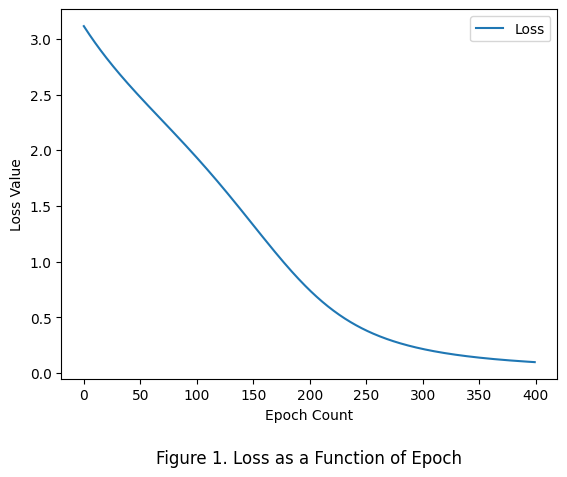

In [257]:
# @title Training History

fig = plt.figure()
ax = fig.add_subplot()

x = list(history.keys())
y = list(history.values())
ax.plot(x, y, label="Loss")

ax.set_title("Figure 1. Loss as a Function of Epoch", y=-0.25)
ax.set_xlabel("Epoch Count")
ax.set_ylabel("Loss Value")
ax.legend()

plt.show()


# References

[1] A, Minnaar. "Word2Vec Tutorial Part II: The Continuous Bag-of-Words Model." Chris McCormick. https://mccormickml.com/assets/word2vec/Alex_Minnaar_Word2Vec_Tutorial_Part_II_The_Continuous_Bag-of-Words_Model.pdf (accessed November 15, 2025)

[2] D, Wei. "Essential Math for Machine Learning: Safe Softmax.“ Medium. https://medium.com/@weidagang/essential-math-for-machine-learning-safe-softmax-1ddcc21c744f (accessed November 15, 2025)